### Computational Methods (16:540:540) - Spring 2021
#### Homework 6 – Python Coding

1. Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

2. Assign the output $y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

3. Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn:

        a) Support vector regression

        b) Decision Tree

        c) Artificial Neural Network

Report the MSE and R-squared error. Use 70% of the dataset for training and 30% for testing.

In [45]:
# 1.Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

In [46]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
rng = default_rng(5)
p, n=5, 100

In [47]:
# multivariate normal distribution
mu = np.random.uniform(-10,10,size=p)
C = np.random.random((p,p))
cov = C @ C.T # positive semi-definite
x_1 = rng.multivariate_normal(mu, cov, n)

In [48]:
x1_mean = np.mean(x_1)
x1_var = np.var(x_1)

In [49]:
print(f'From univariate normal distribution,the mean of 100 random the samples is {round(x1_mean,4)},the variance is {round(x1_var,4)}')

From univariate normal distribution,the mean of 100 random the samples is -7.228,the variance is 3.388


In [50]:
# 2. Assign the output:

$y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

In [51]:
rng = default_rng(5)
y = 5 * x_1[:,0]+ 9*x_1[:,1] + (2 * x_1[:,2])**2 + rng.normal(0,1,n)

In [52]:
# 3.Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=123)

In [55]:
# a) Support vector regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [56]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

In [57]:
print("R2 score in rbf kernel :", r2_score(y_test, y_rbf),"MSE :",mean_squared_error(y_test, y_rbf))
print("R2 score in linear kernel :", r2_score(y_test, y_lin),"MSE :",mean_squared_error(y_test, y_lin))
print("R2 score in polynomial kernel :", r2_score(y_test, y_poly),"MSE :",mean_squared_error(y_test, y_poly))

R2 score in rbf kernel : 0.995746875440552 MSE : 14.125686699424557
R2 score in linear kernel : 0.9827222738003478 MSE : 57.383634963750026
R2 score in polynomial kernel : 0.9991971460642571 MSE : 2.666478021790208


In [58]:
print("With rbf kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))
print("With linear kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_lin),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_lin))
print("With polynomial kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_poly),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_poly))

With rbf kernel, Mean squared error: 14.13 ,the Variance score: 1.00(best fit = 1)
With linear kernel, Mean squared error: 57.38 ,the Variance score: 0.98(best fit = 1)
With polynomial kernel, Mean squared error: 2.67 ,the Variance score: 1.00(best fit = 1)


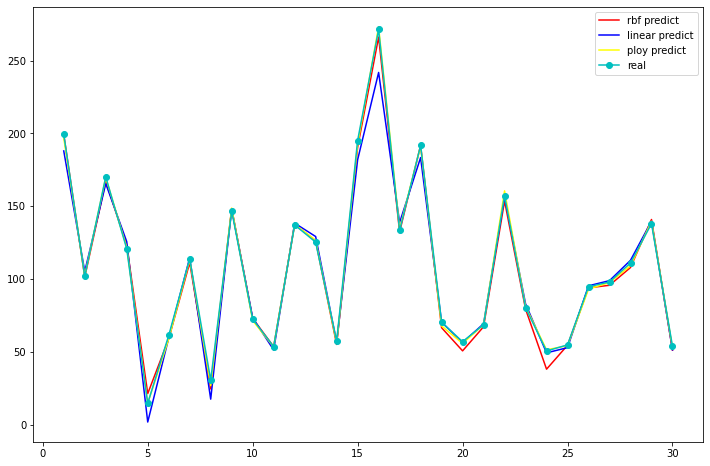

In [59]:
plt.figure(figsize=(12,8))

x_s = np.arange(1,len(x_test) + 1)

plt.plot(x_s, y_rbf,color='red', label="rbf predict")
plt.plot(x_s, y_lin, color='blue',label="linear predict")
plt.plot(x_s, y_poly,color='yellow',label="ploy predict")
plt.plot(x_s, y_test, 'co-', label="real")
plt.legend()

In [60]:
# b) decision  Decision Tree in Regression 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=6).fit(x_train,y_train)

In [61]:
print("The  Decision Tree Regression model training score is ",tree_reg.score(x_train, y_train))

The  Decision Tree Regression model training score is  0.9993146298735357


In [62]:
y_pred_tree = tree_reg.predict(x_test)

Text(0, 0.5, 'Predicted')

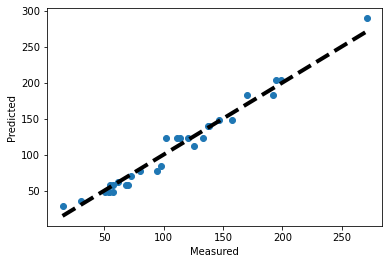

In [63]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_tree)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [64]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,  y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_pred_tree))

Mean Absolute Error: 8.181131201957303
Mean Squared Error: 98.90030682397835
Root Mean Squared Error: 9.944863338627552
Variance score: 0.97(best fit = 1)


In [348]:
# c) Artificial Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [349]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [350]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10),activation='logistic',solver='adam',max_iter=10000)
mlp.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10),
              max_iter=10000)

In [351]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [352]:
import warnings
warnings.filterwarnings("ignore")

In [353]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

         127       1.00      1.00      1.00         2
         133       1.00      1.00      1.00         1
         139       1.00      1.00      1.00         1
         155       1.00      1.00      1.00         1
         164       1.00      1.00      1.00         1
         168       1.00      1.00      1.00         1
         169       1.00      1.00      1.00         1
         171       1.00      1.00      1.00         2
         176       1.00      1.00      1.00         2
         181       1.00      1.00      1.00         1
         183       1.00      1.00      1.00         2
         186       1.00      1.00      1.00         1
         187       1.00      1.00      1.00         2
         189       1.00      1.00      1.00         2
         190       1.00      1.00      1.00         3
         191   

Text(0, 0.5, 'Predicted')

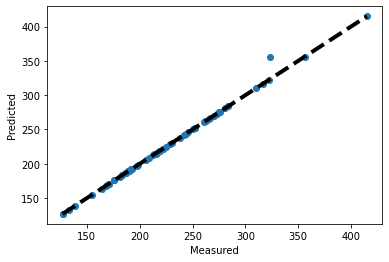

In [354]:
fig, ax = plt.subplots()
ax.scatter(y_train,predict_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [355]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
              precision    recall  f1-score   support

         133       0.00      0.00      0.00         0
         139       0.00      0.00      0.00         0
         152       0.00      0.00      0.00         1
         155       0.00      0.00      0.00         1
         164       0.00      0.00      0.00         1
         168       0.00      0.00      0.00         1
         171       0.00      0.00      0.00         0
         178       0.00      0.00      0.00         1
         187       0.00      0.00      0.00         2
         189       0.00      0.00      0.00         0
         190       0.00      0.00      0.00         0
         193       0.00      0.00      0.00         1
         195       0.00      0.00      0.00         1
         197       0.00      0.00      0.00         1
         205       0.00      0.00      0.00         1
         206   

Text(0, 0.5, 'Predicted')

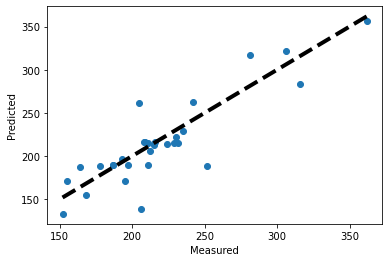

In [356]:
fig, ax = plt.subplots()
ax.scatter(y_test,predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

### Conclusion

WE use SVR, DecisionTree and ANN method for the regression, we can see in this problem, the SVR performs best.